
## In this Script we are Anonymizing Results and Filtering Low-Accuracy Participants (<90% on Catch Trials)

In this script I am removing prolific IDs and other information that could be used to identify participants.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import shutil
import re
import os
import glob
import pandas as pd

#### Anonomizing the dataset and saving it after excluding participants below 90 % accuracy in catch trials

In [ ]:
# Path setup
directory_path = "/Users/born/Downloads/results (27)"
new_directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_final_exc_catchtrials3"
os.makedirs(new_directory_path, exist_ok=True)

# Find all JSON files
json_files = glob.glob(os.path.join(directory_path, "*.json"))
print(f"Found {len(json_files)} JSON files.")

excluded_count = 0

for json_file in json_files:
    print(f"Processing file: {json_file}")

    # Load JSON data
    with open(json_file, 'r') as file:
        json_data = json.load(file)

    # Convert to DataFrame
    df = pd.json_normalize(json_data)

    # Check for 'selected_image' occurrences of "No image selected"
    if 'selected_image' in df.columns:
        no_image_count = (df['selected_image'] == "No image selected").sum()
        if no_image_count > 10:
            excluded_count += 1
            continue  # Skip saving this participant's data

    # Check if the required columns for catch trials exist to prevent errors
    if 'exp_trial_type' in df.columns and 'catch_trial_correct' in df.columns:
        # Filtering for catch trials and calculating performance
        catch_trials_df = df[df['exp_trial_type'] == 'catch_trial']
        average_performance = catch_trials_df['catch_trial_correct'].mean() * 100
        
        # Exclude participants with performance below 90%
        if average_performance < 90:
            excluded_count += 1
            continue

    # Anonymize data
    if 'prolific_id' in df.columns:
        df['prolific_id'] = "removed"

    # Save to new directory
    new_file_path = os.path.join(new_directory_path, os.path.basename(json_file))
    with open(new_file_path, 'w') as f:
        json.dump(df.to_dict('records'), f)

# Reporting
print(f"Excluded {excluded_count} files based on performance and missed responses criteria.")
print(f"Processed and saved {len(json_files) - excluded_count} files.")


Found 501 JSON files.
Processing file: /Users/born/Downloads/results (27)/2024-04-16 14_57_03.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 12_47_36.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 10_33_14.json
Processing file: /Users/born/Downloads/results (27)/2024-04-11 12_21_59.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 09_25_50.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 17_29_54.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 09_06_49.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 12_16_55.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 09_32_03.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 13_48_57.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 13_49_57.json
Processing file: /Users/born/Downloads/results (27)/2024-04-12 10_33_43.json
Processing file: /Users/born/Downloads/results (27)/20

#### Version going back to saving the data as a single .json object per trial

In [80]:
# Path setup for both loading and saving
directory_path = "/Users/born/Downloads/results (27)"
new_directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_final_exc_perf_outliers"
os.makedirs(new_directory_path, exist_ok=True)

# Find all JSON files
json_files = glob.glob(os.path.join(directory_path, "*.json"))
print(f"Found {len(json_files)} JSON files.")

excluded_count = 0
dataframe_list = []

for json_file in json_files:
    print(f"Processing file: {json_file}")

    # Load JSON data
    with open(json_file, 'r') as file:
        json_data = json.load(file)

    # Convert to DataFrame
    df = pd.json_normalize(json_data)

    # Perform checks and filter data
    # Check for 'selected_image' occurrences of "No image selected"
    no_image_count = df['selected_image'].eq("No image selected").sum() if 'selected_image' in df.columns else 0
    catch_trial_performance = df[df['exp_trial_type'].eq('catch_trial')]['catch_trial_correct'].mean() * 100 if 'exp_trial_type' in df.columns and 'catch_trial_correct' in df.columns else 100

    # Apply exclusion criteria
    if no_image_count > 10 or catch_trial_performance < 90:
        excluded_count += 1
        continue  # Skip saving this participant's data

    # Anonymize data by removing Prolific ID
    if 'prolific_id' in df.columns:
        df['prolific_id'] = "removed"

    # Optionally add the file identifier as a new column
    file_identifier = os.path.splitext(os.path.basename(json_file))[0]
    df['file_identifier'] = file_identifier

    # Append the modified DataFrame to the list for further processing or concatenation
    dataframe_list.append(df)

    # Save the modified DataFrame back to a JSON file in the new directory
    new_file_path = os.path.join(new_directory_path, os.path.basename(json_file))
    df.to_json(new_file_path, orient='records', lines=True)  # Ensure line-delimited JSON

# Concatenate all modified DataFrames into a single DataFrame for further processing
df_combined = pd.concat(dataframe_list, ignore_index=True)
print(f"Combined DataFrame has {df_combined.shape[0]} rows.")
print(f"Excluded {excluded_count} files based on performance and missed responses criteria.")
print(f"Processed and saved {len(json_files) - excluded_count} files.")

# Display unique subject IDs from the combined DataFrame
unique_subject_ids = df_combined['subject_id'].unique()
print("Unique Subject IDs:", unique_subject_ids)


Found 501 JSON files.
Processing file: /Users/born/Downloads/results (27)/2024-04-16 14_57_03.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 12_47_36.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 10_33_14.json
Processing file: /Users/born/Downloads/results (27)/2024-04-11 12_21_59.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 09_25_50.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 17_29_54.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 09_06_49.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 12_16_55.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 09_32_03.json
Processing file: /Users/born/Downloads/results (27)/2024-04-15 13_48_57.json
Processing file: /Users/born/Downloads/results (27)/2024-04-16 13_49_57.json
Processing file: /Users/born/Downloads/results (27)/2024-04-12 10_33_43.json
Processing file: /Users/born/Downloads/results (27)/20

####  Checking if there are now any untested files, to make sure we are in line with our variable-balancing strategy.

In [ ]:
# Define the directory path containing the JSON files
directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_final_exc_catchtrials3"

# Use glob to find all JSON files in the directory
json_files = glob.glob(os.path.join(directory_path, "*.json"))
print(f"Found {len(json_files)} JSON files.")

all_data = []

# Load data from each JSON file
for file_path in json_files:
    with open(file_path, 'r') as file:
        # Load the JSON data from the file
        json_data = json.load(file)
        # If your JSON data is nested, you might need to adjust the record_path
        # For flat structures, this step can be simplified
        df = pd.json_normalize(json_data)
        all_data.append(df)  # Append the DataFrame to the list

# Concatenate all dataframes in the list into one dataframe
df_combined = pd.concat(all_data, ignore_index=True)

# Assume df_combined is already available
# Ensure all entries are strings and filter out any that don't start with 'participant_'
subject_ids = df_combined['subject_id'].dropna().astype(str)
filtered_ids = [id for id in subject_ids if id.startswith('participant_')]

# Extract numbers from valid 'participant_x' formatted strings
participant_numbers = []
for id in filtered_ids:
    parts = id.split('_')
    if len(parts) == 2 and parts[1].isdigit():
        participant_numbers.append(int(parts[1]))

# Sort participant numbers
participant_numbers_sorted = np.sort(participant_numbers)

# Generate the complete range of expected IDs (0 to 449)
expected_ids = np.arange(0, 450)

# Find missing IDs by comparing the actual IDs to the expected range
missing_ids = np.setdiff1d(expected_ids, participant_numbers_sorted)

# Print missing IDs
print("Missing participant IDs:", missing_ids)


Found 473 JSON files.
Missing participant IDs: []


In [ ]:
# Create a new column to identify rows where 'selected_image' is "No image selected"
df_combined['no_image_selected'] = (df_combined['selected_image'] == "No image selected")

# Group by 'subject_id' and sum the True values in 'no_image_selected'
no_image_counts = df_combined.groupby('subject_id')['no_image_selected'].sum()

# Convert the series to a DataFrame and rename the column
no_image_counts_df = no_image_counts.reset_index()
no_image_counts_df.rename(columns={'no_image_selected': 'No_Image_Selected_Count'}, inplace=True)

# Filter to find participants with more than 2 occurrences of "No image selected"
participants_above_threshold = no_image_counts_df[no_image_counts_df['No_Image_Selected_Count'] > 2]

# Print the filtered DataFrame
print(participants_above_threshold)

          subject_id  No_Image_Selected_Count
5    participant_102                        4
11   participant_108                       21
22   participant_118                        4
32   participant_127                        3
33   participant_128                        4
55   participant_148                        3
69   participant_160                       10
70   participant_161                       34
85   participant_175                        3
95   participant_184                        3
99   participant_188                        4
101   participant_19                        3
102  participant_190                        3
109  participant_197                        7
146   participant_23                       10
147  participant_230                        3
152  participant_235                       17
155  participant_238                        4
172  participant_253                        4
187  participant_267                       40
193  participant_272              

In [ ]:
subject_ids = df_combined['subject_id'].dropna().astype(str)
filtered_ids = [id for id in subject_ids if id.startswith('participant_')]

# Extract numbers from valid 'participant_x' formatted strings
participant_numbers = []
for id in filtered_ids:
    parts = id.split('_')
    if len(parts) == 2 and parts[1].isdigit():
        participant_numbers.append(int(parts[1]))

# Sort participant numbers
participant_numbers_sorted = np.sort(participant_numbers)

# Generate the complete range of expected IDs (0 to 449)
expected_ids = np.arange(0, 450)

# Find missing IDs by comparing the actual IDs to the expected range
missing_ids = np.setdiff1d(expected_ids, participant_numbers_sorted)

# Print missing IDs
print("Missing participant IDs:", missing_ids)

Missing participant IDs: []


In [ ]:
# Define the directory paths
directory_path = "/Users/born/Downloads/results (20)"
new_directory_path = "/Users/born/Downloads/nonidentifiable_results_exp_prefinal"

# Use glob to find all JSON files in the directory
json_files = glob.glob(os.path.join(directory_path, "*.json"))
os.makedirs(new_directory_path, exist_ok=True)  # Ensure the new directory exists

# List to track files with undefined or missing subject_id
files_with_missing_subject_id = []

# Process each JSON file
for json_file in json_files:
    with open(json_file, 'r') as file:
        json_data = json.load(file)
    
    # Normalize JSON data into a DataFrame
    df = pd.json_normalize(json_data)
    
    # Check if 'subject_id' is in the DataFrame columns
    if 'subject_id' not in df.columns:
        files_with_missing_subject_id.append(os.path.basename(json_file))
    else:
        # Check if all entries for 'subject_id' are null
        if df['subject_id'].isnull().all():
            files_with_missing_subject_id.append(os.path.basename(json_file))

# Display results
if files_with_missing_subject_id:
    print("Files with undefined or missing subject_id:")
    for filename in files_with_missing_subject_id:
        print(filename)
else:
    print("No files with undefined or missing subject_id.")


No files with undefined or missing subject_id.


#### Checking if I can load the files after they have been anonomized

In [ ]:
# Specify the path to one of the modified JSON files
file_path = "/Users/born/Downloads/nonidentifiable_results_exp_prefinal/2024-04-11 11_00_10.json"  

# Read the JSON file into a DataFrame
df = pd.read_json(file_path, lines=True)  

# Display the DataFrame
print(df.head())  

        rt                                              url     trial_type  \
0   5323.0  stimuli/consent_form/EXTERNAL_CONSENT_PAGE.HTML  external-html   
1    803.0                                             None     fullscreen   
2   4235.0                                             None         survey   
3      NaN                                             None        preload   
4  29573.0                                             None   instructions   

   trial_index  time_elapsed internal_node_id                    start  \
0            0          5409      0.0-0.0-0.0  2024-04-11 08:29:43.258   
1            1          7231      0.0-0.0-1.0  2024-04-11 08:29:43.258   
2            2         11531      0.0-0.0-2.0  2024-04-11 08:29:43.258   
3            3         57240      0.0-0.0-3.0  2024-04-11 08:29:43.258   
4            4         86819      0.0-0.0-4.0  2024-04-11 08:29:43.258   

       subject_id                  study_id     OS  ... catch_trial_correct  \
0  part

### Check for prolific PID to make sure it's removed

In [ ]:
if 'prolific_id' in df.columns:
    print(df['prolific_id'].head())
else:
    print("Column 'prolific_id' does not exist in the DataFrame.")

0    removed
1    removed
2    removed
3    removed
4    removed
Name: prolific_id, dtype: object


/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_67773/1154751687.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_performance_participants, x='subject_id', y='Performance', palette='viridis')


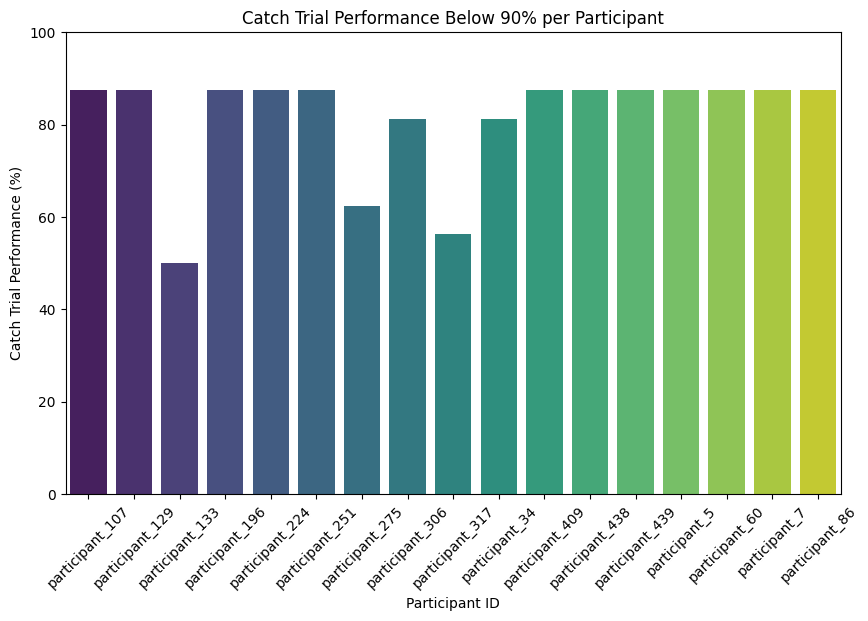

Number of incorrect catch trials per low-performing participant:
subject_id
participant_107     2
participant_129     2
participant_133     8
participant_196     2
participant_224     2
participant_251     2
participant_275    12
participant_306     3
participant_317     7
participant_34      3
participant_409     2
participant_438     2
participant_439     2
participant_5       2
participant_60      2
participant_7       2
participant_86      2
Name: catch_trial_correct, dtype: int64


In [ ]:
## Data quality checks 
# Load all JSON files from a specified directory
directory_path = "/Users/born/Downloads/results (23)"
json_files = glob.glob(os.path.join(directory_path, "*.json"))
all_data = []

for file_path in json_files:
    with open(file_path, 'r') as file:
        data = json.load(file)
        all_data.extend(data)  # Assuming each file contains a list of records

# Convert the list of all data into a DataFrame
df = pd.json_normalize(all_data)

# Filtering for catch trials
catch_trials_df = df[df['exp_trial_type'] == 'catch_trial']

# Calculate accuracy per participant
performance_per_participant = catch_trials_df.groupby('subject_id')['catch_trial_correct'].mean() * 100
performance_per_participant = performance_per_participant.reset_index(name='Performance')

# Filter to show only participants with performance below 90%
low_performance_participants = performance_per_participant[performance_per_participant['Performance'] < 90]

# Plotting low performance participants
plt.figure(figsize=(10, 6))
sns.barplot(data=low_performance_participants, x='subject_id', y='Performance', palette='viridis')
plt.xlabel('Participant ID')
plt.ylabel('Catch Trial Performance (%)')
plt.title('Catch Trial Performance Below 90% per Participant')
plt.ylim(0, 100)  # Set y-axis limits to show percentages from 0 to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig("/Users/born/Downloads/catch_trial_performance_below_90.png", dpi=300, bbox_inches='tight')
plt.show()

# Counting the number of incorrect catch trials per participant who performed below 90%
incorrect_trials_per_low_performers = catch_trials_df[catch_trials_df['subject_id'].isin(low_performance_participants['subject_id'])].groupby('subject_id')['catch_trial_correct'].apply(lambda x: (x == 0).sum())

# Printing the number of incorrect catch trials for each low-performing participant
print("Number of incorrect catch trials per low-performing participant:")
print(incorrect_trials_per_low_performers)
